In [1]:
pip install krippendorff

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import nltk
nltk.download('punkt')

# Reading Gaze4Hate Original Sentences
orig_sentence_file = "gaze4hate_sentences_to_annotate.xlsx"
orig_sent_df = pd.read_excel(open(orig_sentence_file, 'rb'), sheet_name='stimuli')
orig_sent_df= orig_sent_df.loc[orig_sent_df['Cond_remark']!='fam']

/Users/liyueou/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /Users/liyueou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
### Task 1: Data Exploration
joined_data = ''.join(orig_sent_df['processed_assertion'].tolist())
joined_data = joined_data.replace(',', ' , ').replace('.', ' . ')
tokens1 = joined_data.split()
print(tokens1)
num_tokens1 = len(tokens1)
types1 = set(tokens1)
num_types1 = len(types1)
print(f"Token的数量：{num_tokens1}")
print(f"Type的数量：{num_types1}")

# with NLTK
tokens = nltk.word_tokenize(joined_data)
print(tokens)
num_tokens = len(tokens)
types = set(tokens)
num_types = len(types)
print(f"Token的数量：{num_tokens}")
print(f"Type的数量：{num_types}")

In [ ]:
data = orig_sent_df['processed_assertion'].tolist()
lengths = [len(nltk.word_tokenize(sentence)) for sentence in data]

max_length = max(lengths)
min_length = min(lengths)
avg_length = sum(lengths) / len(lengths)

print(f"最大句子长度（以词为单位）：{max_length}")
print(f"最小句子长度（以词为单位）：{min_length}")
print(f"平均句子长度（以词为单位）：{avg_length}")

最大句子长度（以词为单位）：16
最小句子长度（以词为单位）：4
平均句子长度（以词为单位）：8.266666666666667


In [64]:
### Task 2: Evaluate interrater Agreement
from statsmodels.stats.inter_rater import fleiss_kappa
import krippendorff
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


with open('annotated_sentences_li.txt', 'r') as file_li:
  data_li = eval(file_li.read())
  #print(data)

with open('annotated_sentences_xiong.txt', 'r') as file_xiong:
  data_xiong = eval(file_xiong.read())



with open('gaze4hate_sentences_to_annotate_together.xlsx', 'r', encoding='iso-8859-1') as file_other_group:
  data_other_group = pd.read_excel('gaze4hate_sentences_to_annotate_together.xlsx')



annotation_sifan = [str(item) for item in data_other_group['Annotator_Sifan'] .tolist()]
annotation_nk = [str(item) for item in data_other_group["Annotator_nk"].tolist()]
annotation_nizar= [str(item) for item in data_other_group["Annotator_nizar"].tolist()]
annotation_li = [item[1] for item in data_li]
annotation_xiong = [item[1] for item in data_xiong]
annotation_gold = [str(item) for item in data_other_group['Gold Label'] .tolist()]


#print(annotation_li)
#print(annotation_sifan)
print(annotation_nizar)
# 将列表转换为数值，因为 Krippendorff's Alpha 需要数值输入
# 这里我们简单地将每个类别映射到一个整数
mapping = {'implicit': 1, 'explicit': 2, 'other': 3}
list1_numeric = [mapping[item] for item in annotation_li]
list2_numeric = [mapping[item] for item in annotation_xiong]
list3_numeric = [mapping[item] for item in annotation_sifan]
list4_numeric = [mapping[item] for item in annotation_nk]
list5_numeric = [mapping[item] for item in annotation_nizar]
list6_numeric = [mapping[item] for item in annotation_gold]
# 将两个列表组合成一个矩阵
matrix = np.array([list5_numeric,list7_numeric])

# 计算 Krippendorff's Alpha
alpha = krippendorff.alpha(matrix)
print(f"Krippendorff's Alpha is {alpha}")

['implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'explicit', 'implicit', 'explicit', 'explicit', 'implicit', 'implicit', 'explicit', 'explicit', 'implicit', 'implicit', 'implicit', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'implicit', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'explicit', 'implicit', 'other', 'implicit', 'implicit', 'other', 'other', 'implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'explicit', 'explicit', 'explicit', 'explicit', 'explicit', 'implicit', 'other', 'implicit', 'explicit', 'explicit', 'implicit', 'explicit', 'other', 'explicit', 'explicit', 'implicit', 'explicit', 'explicit', 'implicit', 'explicit', 'explicit', 'explicit', 'other', 'explicit', 'other', 'other', 'other', 'implicit', 'other', 'implicit', 'implicit', 'explicit', 'implicit', 'explicit', 'explicit', 'implicit', 'explicit', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit

In [37]:
from collections import Counter

# 五组数据的分类结果列表
classifications = [annotation_li, annotation_xiong, annotation_sifan, annotation_nk, annotation_nizar]

# 进行多数投票
majority_voted_classifications = []
for i in range(len(annotation_li)):
    votes = [classifications[j][i] for j in range(len(classifications))]
    majority_vote = Counter(votes).most_common(1)[0][0]
    majority_voted_classifications.append(majority_vote)

print(majority_voted_classifications)


['implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'explicit', 'explicit', 'explicit', 'explicit', 'implicit', 'implicit', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'other', 'other', 'explicit', 'other', 'other', 'other', 'other', 'other', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'implicit', 'other', 'implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'explicit', 'explicit', 'explicit', 'explicit', 'explicit', 'implicit', 'implicit', 'implicit', 'implicit', 'explicit', 'other', 'other', 'other', 'other', 'other', 'other', 'explicit', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'implicit', 'implicit', 'other', 'implicit', 'explicit', 'explicit', 'implicit', 'explicit', 'explicit', 'other', 'implicit', 'other', 'implicit', 'other', 'explicit', 'other', 'explicit', 'explicit', 'other', 'other']


In [38]:
data_other_group['Majority_Voted_Classification'] = majority_voted_classifications

# 将修改后的 DataFrame 保存回 Excel 表格
data_other_group.to_excel('gaze4hate_sentences_to_annotate_together.xlsx', index=False)


In [39]:
list7_numeric = [mapping[item] for item in majority_voted_classifications]


In [66]:
matrix = np.array([list7_numeric, list6_numeric])

# 计算 Krippendorff's Alpha
alpha = krippendorff.alpha(matrix)
print(f"Krippendorff's Alpha is {alpha}")

Krippendorff's Alpha is 0.12354715861318566


In [43]:

# 将新列数据添加为 DataFrame 的新列
data_other_group['annotation_li'] = annotation_li
data_other_group['annotation_xiong']= annotation_xiong
# 保存修改后的 DataFrame 到 Excel 文件
data_other_group.to_excel('gaze4hate_sentences_to_annotate_together.xlsx', index=False)

In [92]:
from sklearn.metrics import confusion_matrix


# 筛选出 'hate_w_high' 类别的数据
hate_w_high_data = data_other_group[data_other_group['Cond_remark'] == 'hate_w_high']

# 计算混淆矩阵
conf_matrix = confusion_matrix(hate_w_high_data['Gold Label'], hate_w_high_data['Majority_Voted_Classification'])

# 打印结果
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Confusion Matrix:
[[5 5]
 [1 9]]
Accuracy: 0.7
Precision: 0.6428571428571429
Recall: 0.9
F1 Score: 0.75


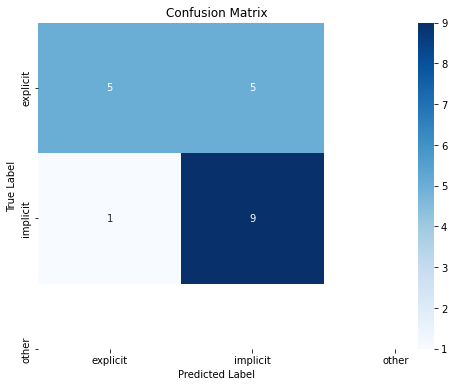

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [90]:
from sklearn.metrics import confusion_matrix

# 初步筛选数据
no_hate_w_data = data_other_group[data_other_group['Cond_remark'] == 'no_hate_w']

# 提取 Gold Label 和 Majority_Voted_Classification 列的数据
gold_labels = no_hate_w_data['Gold Label']
predicted_labels = no_hate_w_data['Majority_Voted_Classification']

# 计算混淆矩阵
conf_matrix = confusion_matrix(gold_labels, predicted_labels)

# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
[[2 1 1]
 [0 0 1]
 [0 0 5]]
Accuracy: 0.2
Precision: 0.0
Recall: nan
F1 Score: nan


/var/folders/mw/gw6mcst16fx2qzm_dp7wqtn40000gn/T/ipykernel_2666/3216450242.py:24: RuntimeWarning: invalid value encountered in scalar divide
  recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


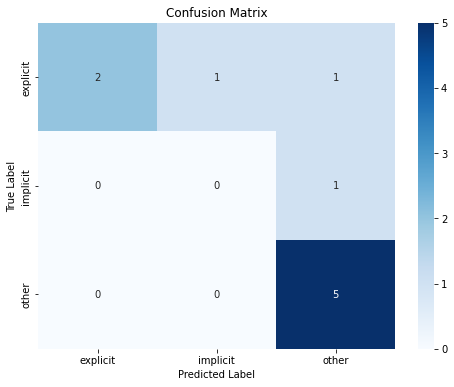

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [88]:
from sklearn.metrics import confusion_matrix

# 初步筛选数据
no_hate_w_data = data_other_group[data_other_group['Cond_remark'] == 'hate_w_med']

# 提取 Gold Label 和 Majority_Voted_Classification 列的数据
gold_labels = no_hate_w_data['Gold Label']
predicted_labels = no_hate_w_data['Majority_Voted_Classification']

# 计算混淆矩阵
conf_matrix = confusion_matrix(gold_labels, predicted_labels)

# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
[[0 4 0]
 [0 3 0]
 [0 2 1]]
Accuracy: 0.3
Precision: 0.42857142857142855
Recall: 1.0
F1 Score: 0.6


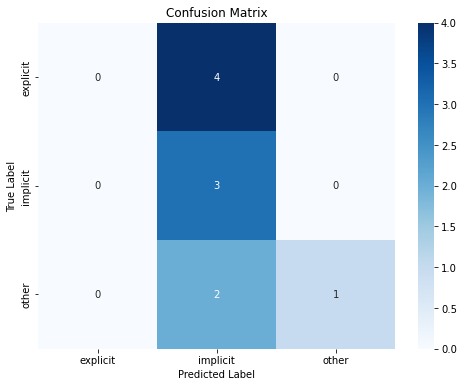

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [86]:
from sklearn.metrics import confusion_matrix

# 初步筛选数据
no_hate_w_data = data_other_group[data_other_group['Cond_remark'] == 'hate_m']

# 提取 Gold Label 和 Majority_Voted_Classification 列的数据
gold_labels = no_hate_w_data['Gold Label']
predicted_labels = no_hate_w_data['Majority_Voted_Classification']

# 计算混淆矩阵
conf_matrix = confusion_matrix(gold_labels, predicted_labels)

# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
[[5 0]
 [1 4]]
Accuracy: 0.9
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


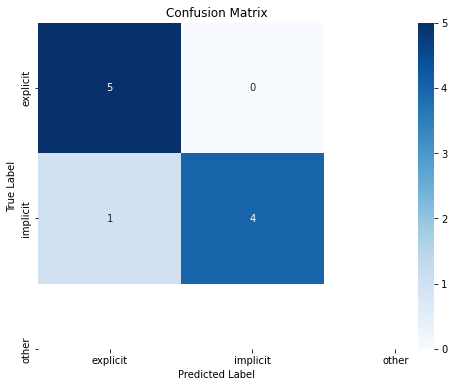

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [84]:
from sklearn.metrics import confusion_matrix

# 初步筛选数据
no_hate_w_data = data_other_group[data_other_group['Cond_remark'] == 'neutral_w']

# 提取 Gold Label 和 Majority_Voted_Classification 列的数据
gold_labels = no_hate_w_data['Gold Label']
predicted_labels = no_hate_w_data['Majority_Voted_Classification']

# 计算混淆矩阵
conf_matrix = confusion_matrix(gold_labels, predicted_labels)

# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
[[ 2  0  5]
 [ 0  0 10]
 [ 0  0  3]]
Accuracy: 0.1
Precision: nan
Recall: nan
F1 Score: nan


/var/folders/mw/gw6mcst16fx2qzm_dp7wqtn40000gn/T/ipykernel_2666/1982260007.py:21: RuntimeWarning: invalid value encountered in scalar divide
  precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
/var/folders/mw/gw6mcst16fx2qzm_dp7wqtn40000gn/T/ipykernel_2666/1982260007.py:24: RuntimeWarning: invalid value encountered in scalar divide
  recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


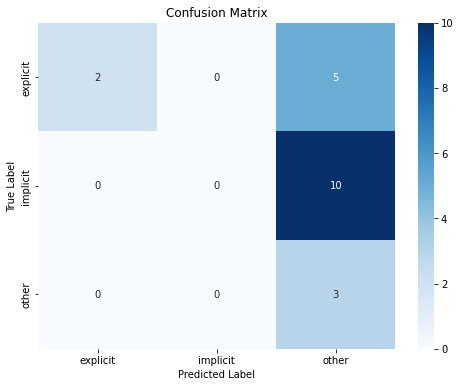

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [82]:
from sklearn.metrics import confusion_matrix

# 初步筛选数据
no_hate_w_data = data_other_group[data_other_group['Cond_remark'] == 'pos_w']

# 提取 Gold Label 和 Majority_Voted_Classification 列的数据
gold_labels = no_hate_w_data['Gold Label']
predicted_labels = no_hate_w_data['Majority_Voted_Classification']

# 计算混淆矩阵
conf_matrix = confusion_matrix(gold_labels, predicted_labels)

# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# 计算精度
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# 计算召回率
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# 计算 F1 分数
f1 = 2 * precision * recall / (precision + recall)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
[[4 4 2]
 [3 2 5]
 [0 0 0]]
Accuracy: 0.3
Precision: 0.3333333333333333
Recall: 0.4
F1 Score: 0.3636363636363636


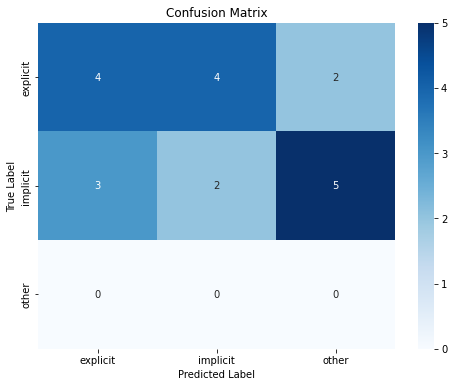

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['explicit', 'implicit', 'other'], yticklabels=['explicit', 'implicit', 'other'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [94]:
# 筛选出 Gold Label 列为 implicit 的行
implicit_data = data_other_group[data_other_group['Gold Label'] == 'implicit']

# 计算 Majority_Voted_Classification 列与 Gold Label 列相匹配的行数
matching_rows = implicit_data[implicit_data['Majority_Voted_Classification'] == 'implicit']

# 计算正确率
accuracy = len(matching_rows) / len(implicit_data)

print("Accuracy when Gold Label is implicit:", accuracy)


Accuracy when Gold Label is implicit: 0.46153846153846156


In [95]:
# 筛选出 Gold Label 列为 explicit 的行
explicit_data = data_other_group[data_other_group['Gold Label'] == 'explicit']

# 计算 Majority_Voted_Classification 列与 Gold Label 列相匹配的行数
matching_rows = explicit_data[explicit_data['Majority_Voted_Classification'] == 'explicit']

# 计算正确率
accuracy = len(matching_rows) / len(explicit_data)

print("Accuracy when Gold Label is explicit:", accuracy)


Accuracy when Gold Label is explicit: 0.45


In [96]:
# 筛选出 Gold Label 列为 other 的行
other_data = data_other_group[data_other_group['Gold Label'] == 'other']

# 计算 Majority_Voted_Classification 列与 Gold Label 列相匹配的行数
matching_rows = other_data[other_data['Majority_Voted_Classification'] == 'other']

# 计算正确率
accuracy = len(matching_rows) / len(other_data)

print("Accuracy when Gold Label is other:", accuracy)


Accuracy when Gold Label is other: 0.8181818181818182


In [5]:
from statsmodels.stats import inter_rater as irr

giro = np.array(matrix).transpose()
kappa = irr.fleiss_kappa(irr.aggregate_raters(giro)[0], method='fleiss')
print(f"Fleiss' Kappa is {kappa}")

Fleiss' Kappa is 0.521512257556365
